https://www.set.or.th/set/historicaltrading.do?symbol=BCH&language=en&country=US
BCH
         Date   Open   High    Low  Close  Change %Change  \
0  2019-04-01  17.20  17.50  17.10  17.20   +0.20   +1.18   
1  2019-04-02  17.30  17.50  17.20  17.30   +0.10   +0.58   
2  2019-04-03  17.40  17.40  17.10  17.10   -0.20   -1.16   
3  2019-04-04  17.10  17.30  17.10  17.20   +0.10   +0.58   
4  2019-04-05  17.20  17.40  17.10  17.20    0.00    0.00   
5  2019-04-09  17.20  17.50  17.10  17.30   +0.10   +0.58   
6  2019-04-10  17.40  17.40  17.20  17.20   -0.10   -0.58   
7  2019-04-11  17.30  17.30  17.00  17.00   -0.20   -1.16   
8  2019-04-12  17.00  17.30  17.00  17.20   +0.20   +1.18   
9  2019-04-17  17.30  17.80  17.20  17.50   +0.30   +1.74   
10 2019-04-18  17.60  17.90  17.40  17.70   +0.20   +1.14   
11 2019-04-19  17.70  18.00  17.60  17.70    0.00    0.00   
12 2019-04-22  17.70  17.90  17.60  17.60   -0.10   -0.56   
13 2019-04-23  17.60  18.00  17.60  17.70   +0.10   +0.57   


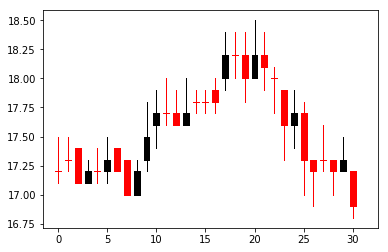

In [8]:
# SET ###
#### A program to access the Stock Exchange of Thailand web site
#### and download data for each item in current portfolio

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mpl_finance as mpf
import re

from urllib.request import urlopen
from bs4 import BeautifulSoup
from mpl_finance import candlestick_ohlc

%matplotlib inline

# Current share portfolio
#symbol = ['BCH','CPF','DTAC','INTUCH','KTB','THCOM','TRUE']
symbol = ['BCH']
for i in symbol:  
    url = 'https://www.set.or.th/set/historicaltrading.do?symbol='+i+'&language=en&country=US'
    print(url)
    html = urlopen(url)

    soup = BeautifulSoup(html, 'lxml')
    text = soup.get_text()
    rows = soup.find_all('tr')
    list_rows = []
    for row in rows:
        cells = row.find_all('td')
        str_cells = str(cells)
        clean = re.compile('<.*?>')
        clean2 = (re.sub(clean, '',str_cells))
        list_rows.append(clean2)

    df = pd.DataFrame(); del df
    df = pd.DataFrame(list_rows)

    df1 = df[0].str.split(', ', expand=True)
    df1[0] = df1[0].str.strip('['); df1[8] = df1[8].str.strip(']')

    col_labels = soup.find_all('th')
    all_header = []
    col_str = str(col_labels)
    cleantext2 = BeautifulSoup(col_str, "lxml").get_text()
    all_header.append(cleantext2)

    df2 = pd.DataFrame(all_header)

    df2 = df2[0].str.split(', ', expand=True)
    df2[0] = df2[0].str.strip('['); df2[8] = df2[8].str.strip(']')

    frames = [df2, df1]
    df1 = pd.concat(frames)

    df1 = df1.rename(columns=df1.iloc[0])
    df1 = df1.drop(df1.index[1:2]) #; df1 = df1.drop(df1.index[1])
    df1['Date'] = pd.to_datetime(df1.Date, format='%d/%m/%Y')
    df1 = df1.sort_values(by=['Date'])
    df1 = df1.reset_index(drop=True)
    
    print(i)
    print(df1)
    print('-------------------------------------------------------')
#    plt.figure(figsize=(10,5),dpi=100)
#    plt.title(i,fontsize=10)
    fig, ax = plt.subplots()
#    plt.plot(df1["Date"],df1["Close"])
    opens = df1["Open"]
    closes = df1["Close"]
    highs = df1["High"]
    lows = df1["Low"]
    mpf.candlestick2_ochl(ax, opens, closes, highs, lows, width=.6, colorup='k', colordown='r', alpha=1)
    plt.show()


In [5]:
df1

Date   Open   High    Low  Close  Change %Change  \
0  2019-01-04  17.20  17.50  17.10  17.20   +0.20   +1.18   
1  2019-02-04  17.30  17.50  17.20  17.30   +0.10   +0.58   
2  2019-02-05  18.20  18.40  17.80  18.00   -0.20   -1.10   
3  2019-03-04  17.40  17.40  17.10  17.10   -0.20   -1.16   
4  2019-03-05  18.00  18.50  18.00  18.20   +0.20   +1.11   
5  2019-04-04  17.10  17.30  17.10  17.20   +0.10   +0.58   
6  2019-04-17  17.30  17.80  17.20  17.50   +0.30   +1.74   
7  2019-04-18  17.60  17.90  17.40  17.70   +0.20   +1.14   
8  2019-04-19  17.70  18.00  17.60  17.70    0.00    0.00   
9  2019-04-22  17.70  17.90  17.60  17.60   -0.10   -0.56   
10 2019-04-23  17.60  18.00  17.60  17.70   +0.10   +0.57   
11 2019-04-24  17.80  17.90  17.70  17.80   +0.10   +0.56   
12 2019-04-25  17.80  17.90  17.70  17.80    0.00    0.00   
13 2019-04-26  17.90  18.00  17.70  17.80    0.00    0.00   
14 2019-04-29  18.00  18.40  17.90  18.20   +0.40   +2.25   
15 2019-04-30  18.20  18.40  18.00  18.20    0.00    0.00   
16 2019-05-04  17.20  17.40  17.10  17.20    0.00    0.00   
17 2019-05-13  17.70  17.80  17.00  17.30   -0.40   -2.26   
18 2019-05-14  17.30  17.30  16.90  17.20   -0.10   -0.58   
19 2019-05-15  17.30  17.60  17.20  17.30   +0.10   +0.58   
20 2019-05-16  17.30  17.30  17.00  17.20   -0.10   -0.58   
21 2019-05-17  17.20  17.50  17.20  17.30   +0.10   +0.58   
22 2019-05-21  17.20  17.20  16.80  16.90   -0.40   -2.31   
23 2019-07-05  18.20  18.40  17.90  18.10   -0.10   -0.55   
24 2019-08-05  18.00  18.10  17.70  18.00   -0.10   -0.55   
25 2019-09-04  17.20  17.50  17.10  17.30   +0.10   +0.58   
26 2019-09-05  17.90  17.90  17.30  17.60   -0.40   -2.22   
27 2019-10-04  17.40  17.40  17.20  17.20   -0.10   -0.58   
28 2019-10-05  17.60  17.90  17.40  17.70   +0.10   +0.57   
29 2019-11-04  17.30  17.30  17.00  17.00   -0.20   -1.16   
30 2019-12-04  17.00  17.30  17.00  17.20   +0.20   +1.18   

   Total Volume(Shares) Total Value('000 Baht)  
0            20,249,034             351,867.57  
1            12,375,091             215,560.66  
2            11,339,529             205,045.95  
3            10,363,220             178,440.11  
4            10,325,220             188,608.48  
5            12,393,001             213,128.41  
6            12,713,458             223,296.84  
7            12,986,081             229,214.62  
8            11,684,933             208,765.00  
9             8,492,132             150,683.45  
10            7,072,799             126,101.88  
11            6,569,488             116,942.83  
12            5,340,358              95,211.93  
13            5,216,160              93,149.98  
14           12,594,020             229,211.53  
15            8,998,990             163,713.12  
16            7,778,760             133,966.94  
17           14,002,629             243,239.48  
18           18,362,901             314,580.72  
19            9,143,015             159,204.77  
20            5,454,578              93,620.49  
21            6,211,807             107,663.16  
22           11,817,590             199,950.61  
23           10,862,535             196,343.70  
24           14,908,220             266,949.18  
25            7,294,540             126,053.85  
26           30,431,282             533,708.95  
27            9,316,751             160,825.49  
28           10,503,627             185,135.97  
29            9,953,054             170,320.43  
30            7,074,800             121,623.00